In [9]:
import math
import scipy.special
import pandas as pd
import numpy as np
from collections import deque
from itertools import combinations
from typing import Union
import matplotlib.pyplot as plt

In [10]:
def toStr(vec) -> str:
    return ''.join(map(str, vec))

def countOnes(vec) -> int:
    return vec.count(1)

def toInt(vec) -> int:
    return int("".join(str(i) for i in vec), 2)

def toBinVec(x, l=0) -> list:
    result = [int(i) for i in bin(x)[2:]]
    missing_zeros = l-len(result)
    if (missing_zeros > 0):
        for i in range(missing_zeros):
            result.insert(0, 0)
    return result

def binary_permutations(lst: []) -> [[]]:
    result = []
    for comb in combinations(range(len(lst)), lst.count(1)):
        permutation = [0] * len(lst)
        for i in comb:
            permutation[i] = 1
        result.append(permutation)
    return result

def rotate_left_vec(vec) -> list:
    shifted = vec.copy()
    temp = deque(shifted)
    temp.rotate(-1)
    return list(temp)

def rotate_left(x, r, l) -> int:
    return (x*2**r) % (2**l-1)

def rotate_right(x, r, l) -> int:
    return rotate_left(x, l-(r % l), l)

def find_min_max(vec) -> Union[int,int,int,list,list]:
    L = len(vec)
    vecToInt = toInt(vec)
    min = vecToInt
    max = 0
    odd_max = 0
    vec_min = vec
    vec_max = vec
    shifted = vec.copy()
    for i in range(L):
        if vecToInt < min:
            min = vecToInt
            vec_min = shifted
        if vecToInt > max:
            max = vecToInt
            vec_max = shifted
        temp = deque(shifted)
        temp.rotate(-1)
        shifted = list(temp)
        vecToInt = toInt(shifted)
    return min, max, odd_max, vec_min, vec_max

def find_rotational_distance(vec1, vec2) -> Union[int,int]:
    L = len(vec1)
    vec1ToInt = toInt(vec1)
    vec2ToInt = toInt(vec2)
    left_shifts = 0
    shifted = vec1.copy()
    for i in range(L):
        if toInt(shifted) == vec2ToInt:
            left_shifts = i
            break
        temp = deque(shifted)
        temp.rotate(-1)
        shifted = list(temp)
    return left_shifts, L-left_shifts

def calculate_c(n: int, U: int) -> int:
    return 2**n-3**U

def calculate_z(parity_vector: []) -> int:
    indices = []
    for i, entry in enumerate(parity_vector, start=0):
        if entry == 1:
            indices.append(i)
    result = 0
    U = len(indices)
    for i, entry in enumerate(indices, start=0):
        result = result + 3**(U-(i+1)) * 2**(entry)
    return result

def z_inverse(z, l) -> int:
    i = 1
    while True:
        vec = toBinVec(i, l)
        if calculate_z(vec) == z and len(vec) == l:
            return i
        i += 1

def cycle(z, c) -> list:
    result = [z]
    item = z
    while (next_item := (3*item+c)//2 if item % 2 == 1 else item // 2) not in result:
        item = next_item
        result.append(item)
    return result

def calculate_M(n: int, U: int) -> Union[int,pd.DataFrame]:
    if n == 0 or U == 0 or n < U:
        return 0, None
    df = pd.DataFrame(columns = ['parity_vector', 'shifted orbits', 'z vals', 'min_z'])
    p_v = [0] * n
    for i in range(U):
        p_v[i] = 1
    permutations = binary_permutations(p_v)
    for i in range(len(permutations)):
        vec = permutations[i]
        z_vals = []
        shifted_vecs = []
        shifted = vec.copy()
        for j in range(len(shifted)):
            shifted_vecs.append(''.join(map(str, shifted)))
            z_vals.append(calculate_z(shifted))
            temp = deque(shifted)
            temp.rotate(-1)
            shifted = list(temp)
        min_z_vals = min(z_vals) if len(z_vals) > 0 else 0
        df.loc[i] = [''.join(map(str, vec)), shifted_vecs, z_vals, min_z_vals]
    return df['min_z'].max(), df

def calculate_N(M:int, n:int, U:int) -> int:
    if M == 0:
        return 0
    r = math.gcd(n, U)
    sum = 0
    for i in range(r):
        sum += 2**(i*n/r)*3**(U-1-i*U/r)
    return 2*M - int(sum)

def generate_df(vecs: [[]]) -> pd.DataFrame:
    df = pd.DataFrame(columns = ['vec', 'L (len)', 'N (1s)', 'min', 'max', 'odd_max', 'vec_min', 'vec_max', 'rot_left', 'quot=(N*rot+1)/L'])
    for i in range(len(vecs)):
        vec = vecs[i]
        L = len(vec)
        min, max, odd_max, vec_min, vec_max = find_min_max(vec)
        rot_dist_left, rot_dist_right = find_rotational_distance(vec_min, vec_max)
        quot = (countOnes(vec)*rot_dist_left+1)/L
        df.loc[i] = [toStr(vec), L, countOnes(vec), min, max, odd_max, toStr(vec_min), toStr(vec_max), rot_dist_left, quot]
    return df

n=14
U=8
M, df_M = calculate_M(n, U)
N = calculate_N(M, n, U)
c = calculate_c(n, U)
print("M({0},{1})={2}".format(n, U, M))
print("N({0},{1})={2}".format(n, U, N))
print("c={0}".format(c))

M(14,8)=21109
N(14,8)=36575
c=9823


In [11]:
#L=17,U=7 works: toStr(toBinVec(z_inv))=10101001010010100 (vec_max)
#L=5,U=2 works: toStr(toBinVec(z_inv))=10100 (vec_max)
#L=8,U=5 works: toStr(toBinVec(z_inv))=11011010 (vec_max)
#L=12,U=7 works: toStr(toBinVec(z_inv))=110101101010 (vec_max)

#print(calculate_z([0,1,0,1,1,0,1,1]))#real max
#print(calculate_z([1,0,1,0,1,1,0,1]))#N
#print(calculate_z([1,1,0,1,1,0,1,0]))#real min (M)

L=8
U=5
M, df_m = calculate_M(L, U)
N = calculate_N(M, L, U)
print("M={0} N={1}".format(M,N))
z_inv = z_inverse(M, L)
#z_inv = z_inverse(N, L)
#print(toStr(toBinVec(z_inv)))
#print(toStr(rotate_left_vec(toBinVec(z_inv))))


print("find left distances")
#319 to 485
vec_from=toBinVec(z_inverse(557, 8),8)
vec_to=toBinVec(z_inverse(319, 8),8)
rot_dist_left, rot_dist_right = find_rotational_distance(vec_from, vec_to)
print("from={0} to={1} rot={2}".format(toStr(vec_from),toStr(vec_to),rot_dist_left))

print(toStr(toBinVec(z_inverse(734, 8),8)))

print(cycle(319, 13))

M=319 N=557
find left distances
from=10101101 to=11011010 rot=4
01101011
[319, 485, 734, 367, 557, 842, 421, 638]


In [12]:
#generate some cycles
rot_cases = []
max_values = []
for i in range(1, 1000):
    vec = toBinVec(i)
    x_min, x_max, odd_x_max, vec_min, vec_max = find_min_max(vec)
    rot_dist_left, rot_dist_right = find_rotational_distance(vec_min, vec_max)
    l = len(vec_max)
    U = countOnes(vec)
    c = calculate_c(l,U)
    quot = (U*rot_dist_left+1)/l
    if quot.is_integer() and x_max not in max_values:
        max_values.append(x_max)
        rot_cases.append([x_min, x_max, toStr(vec_min), toStr(vec_max), l, rot_dist_left, U, quot, x_max-x_min, cycle(calculate_z(vec_max), c), c])

df = pd.DataFrame(rot_cases, columns = ['min', 'max', 'B_min', 'B_max', 'l', 'r', 'U', '(U*r+1)/l', 'B_max-B_min', 'cycle', 'c'])
pd.set_option('display.expand_frame_repr', False)
print(df[4:26])

    min  max      B_min      B_max  l  r  U  (U*r+1)/l  B_max-B_min                                             cycle     c
4     1    8       0001       1000  4  3  1        1.0            7                                      [1, 8, 4, 2]    13
5     7   14       0111       1110  4  1  3        1.0            7                                  [19, 23, 29, 38]   -11
6     1   16      00001      10000  5  4  1        1.0           15                                  [1, 16, 8, 4, 2]    29
7     5   20      00101      10100  5  2  2        1.0           15                               [7, 22, 11, 28, 14]    23
8    11   26      01011      11010  5  3  3        2.0           15                              [23, 37, 58, 29, 46]     5
9    15   30      01111      11110  5  1  4        1.0           15                            [65, 73, 85, 103, 130]   -49
10    1   32     000001     100000  6  5  1        1.0           31                              [1, 32, 16, 8, 4, 2]    61
11   31 

     min   max         B_min         B_max   l  r  U  (U*r+1)/l  B_max-B_min  B_min2-B_min1  B_max2-B_max1  diff_quot
15    43   106       0101011       1101010   7  5  4        3.0           63           32.0           80.0   2.500000
16    55   118       0110111       1110110   7  4  5        3.0           63           12.0           12.0   1.000000
22    91   218      01011011      11011010   8  3  5        2.0          127           36.0          100.0   2.777778
21    37   164      00100101      10100100   8  5  3        2.0          127          -54.0          -54.0   1.000000
19     7   224      00000111      11100000   8  5  3        2.0          217          -30.0           60.0  -2.000000
20    31   248      00011111      11111000   8  3  5        2.0          217           24.0           24.0   1.000000
27   171   426     010101011     110101010   9  7  5        4.0          255          140.0          178.0   1.271429
28   239   494     011101111     111101110   9  5  7    

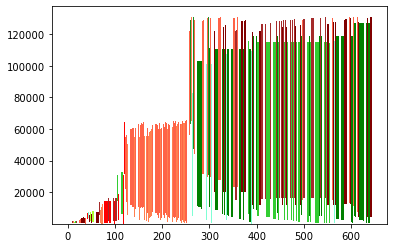

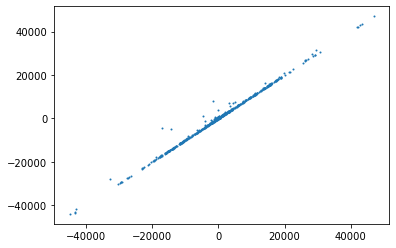

In [25]:
rot_cases = []
max_values = []
for i in range(1, 100000):
    vec = toBinVec(i)
    x_min, x_max, odd_x_max, vec_min, vec_max = find_min_max(vec)
    rot_dist_left, rot_dist_right = find_rotational_distance(vec_min, vec_max)
    l = len(vec_max)
    U = countOnes(vec)
    quot = (U*rot_dist_left+1)/l
    if quot.is_integer() and x_max not in max_values:
        max_values.append(x_max)
        rot_cases.append([x_min, x_max, toStr(vec_min), toStr(vec_max), l, rot_dist_left, U, quot, x_max-x_min])

df = pd.DataFrame(rot_cases, columns = ['min', 'max', 'B_min', 'B_max', 'l', 'r', 'U', '(U*r+1)/l', 'B_max-B_min'])

#line scatter (df_plot = df[(df.q > 1)])
df.sort_values('B_max-B_min', inplace=True)
#df.sort_values(['B_max-B_min', 'min'], ascending=[True, True], inplace=True)

#circ scatter (df_plot = df[(df.q > 1)])
#df.sort_values('r', inplace=True)

#sorting by multiple values
#df.sort_values(['r', 'B_max-B_min'], ascending=[True, True], inplace=True)

df_plot = df.loc[(df['(U*r+1)/l'] > 1)]
#df_plot = df[(df.q > 1) & (df.r.eq(3))]
#df_plot = df[(df.q.eq(2)) & (df.r.eq(3)) & (df.len.eq(8))]
#df_plot = df.loc[(df.q > 1) & (df.r.isin([11, 13]))]
#df_plot = df[df.q.eq(2) & df.r.eq(5)]
#df_plot = df[df.q.eq(5) & df.r.eq(7)]

#df_plot = df.loc[(df['(U*r+1)/l'].isin([5])) & (df.r.isin([3,5,7,9,11]))]

#df_plot = df[(df.len.isin([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]))]
#df_plot = df[(df.len.isin([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33]))]
#df_plot = df_plot[0:60]

df_plot['B_min2-B_min1'] = df_plot['min'].diff()
df_plot['B_max2-B_max1'] = df_plot['max'].diff()
df_plot['diff_quot'] = df_plot['B_max2-B_max1']/df_plot['B_min2-B_min1']
print(df_plot.iloc[1:40,0:12])

x = []
y = []
y_offset = []
color_scheme=['red','green','brown', 'limegreen', 'maroon', 'forestgreen', 'tomato', 'greenyellow', 'coral', 'aquamarine', 'red','green','brown', 'limegreen', 'maroon', 'forestgreen', 'tomato', 'greenyellow', 'coral', 'aquamarine']
colors = []
i = 0
for index, row in df_plot.iterrows():
    x.append(i)
    yo = row['min']
    y_offset.append(yo)
    y.append(row['max']-yo)
    colors.append(color_scheme[row['r']-1])
    i += 1

plt.bar(x, y, bottom=y_offset, color=colors)
plt.show()

plt.scatter(df_plot["B_min2-B_min1"].tolist(), df_plot["B_max2-B_max1"].tolist(), s=1)
plt.show()


In [6]:
#should bring 130
#print(rotate_left(5,7,8))
#should bring 21141
#print(rotate_left(86676,5,17))
#print(rotate_right(86676,12,17))
#should bring 86676
#print(rotate_left(21141,12,17))

vecs=[
    [1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0],
    [1,0,1,0,0],
    [1,0,1,1,0,1,0,1],
    [1,1,0,1,0,1,1,0,1,0,1,0],
    [0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,1]
    ]

L=8
U=5
M, df_m = calculate_M(L,U)
N = calculate_N(M, L, U)
c = calculate_c(L,U)
print("M={0} N={1} c={2}".format(M,N,c))

df = generate_df(vecs)
df.head()

M=319 N=557 c=13


,vec,L (len),N (1s),min,max,odd_max,vec_min,vec_max,rot_left,quot=(N*rot+1)/L
0,10101001010010100,17,7,21141,86676,0,00101001010010101,10101001010010100,12,5.0
1,10100,5,2,5,20,0,00101,10100,2,1.0
2,10110101,8,5,91,218,0,01011011,11011010,3,2.0
3,110101101010,12,7,1387,3434,0,010101101011,110101101010,5,3.0
4,0101101010110101101010110101011,31,18,727102827,1800844650,0,0101011010101101011010101101011,1101011010101101011010101101010,12,7.0


In [7]:
max_n=5
data = np.empty((0, 4), int)
for x in range(max_n):
    data_n = np.empty((0, 4), int)
    for y in range(max_n):
        M, df = calculate_M(x, y)
        N = calculate_N(M, x, y)
        data_n = np.append(data_n, np.array([[x, y, M, N]]), axis=0)
    data=np.append(data, data_n, axis=0)

columns = ['x', 'y', 'M', 'N']
df = pd.DataFrame(data, columns=columns)
df.to_csv('c:/temp/collatz_M_N.csv', index=False)

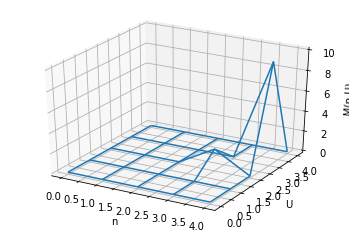

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

max_n = 5
x = np.linspace(0, max_n-1, max_n)
y = np.linspace(0, max_n-1, max_n)
X, Y = np.meshgrid(x, y)
X = X.astype(int)
Y = Y.astype(int)
Z = np.zeros(shape=(max_n, max_n))

def fn_plot_M(x, y):
    M, df = calculate_M(x, y)
    N = calculate_N(M, x, y)
    return N-M

fn_vectorized_M = np.vectorize(fn_plot_M)
Z_M = fn_vectorized_M(X, Y)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z_M)
ax.set_xlabel('n')
ax.set_ylabel('U')
ax.set_zlabel('M(n,U)')
plt.show()